<a id="top"></a>

<div class="alert alert-block alert-success">
<b>Kernel Author:</b>  <br>
<a href="https://bhishanpdl.github.io/" , target="_blank">Bhishan Poudel, Ph.D Astrophysics</a> .
</div>

<a id="data-desc"></a>

<h1> Data Description </h1>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover" title="go to TOC">Go to Top</a>

The data is taken from kaggle competition [Telco Customer Churn](https://www.kaggle.com/blastchar/telco-customer-churn). The main aim of the project is to predict whether a customer will leave (churn) the company or not based on given attributes. This is a binary classification problem and one of the most important usage of machine learning in business world.

**Content**  



Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents


References
- [Exploratory Analysis with Seaborn](https://www.kaggle.com/jsaguiar/exploratory-analysis-with-seaborn)
- [Interactive exploration Churn Customers + modeling](https://www.kaggle.com/kabure/insightful-eda-churn-customers-models-pipeline)

<a id="lib"></a>

<h1> Load the libraries </h1>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover" title="go to TOC">Go to Top</a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os,sys,time
import matplotlib.pyplot as plt
sns.set()

SEED = 100
pd.set_option('max_columns',100)
pd.set_option('max_colwidth',200)
pd.set_option('plotting.backend','matplotlib') # matplotlib, bokeh, altair, plotly
%load_ext watermark
%watermark -iv

numpy    1.18.4
seaborn  0.11.0
json     2.0.9
pandas   1.1.0
autopep8 1.5.2



In [2]:
%%capture
import os
import sys
ENV_COLAB = 'google.colab' in sys.modules

if ENV_COLAB:
    ## install modules
    !pip install watermark

<a id="useful" ></a>

<h1> Useful Scripts </h1> 

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover" title="go to TOC">Go to Top</a>

In [3]:
def show_methods(obj, ncols=4,contains=None):
    lst = [i for i in dir(obj) if i[0]!='_' ]
    if contains is not None:
        lst = [i for i in lst if contains in i]
    df = pd.DataFrame(np.array_split(lst,ncols)).T.fillna('')
    return df

<a id="load-data" ></a>

<h1> Load the Data </h1> 

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover" title="go to TOC">Go to Top</a>

In [4]:
path_data_train = '../data/raw/train.csv'
path_data_test = '../data/raw/test.csv'

if ENV_COLAB:
    path_data_train = 'https://github.com/bhishanpdl/Datasets/raw/master/Projects/Telco_Customer_Churn/raw/train.csv'
    path_data_test = 'https://github.com/bhishanpdl/Datasets/raw/master/Projects/Telco_Customer_Churn/raw/train.csv'

In [5]:
df_train = pd.read_csv(path_data_train)
df_test = pd.read_csv(path_data_test)

print(df_train.shape)
print(df_test.shape)
df_train.head(2).append(df_train.tail(2))

(5634, 21)
(1409, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1621-YNCJH,Female,0,Yes,No,36,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,Yes,Two year,Yes,Credit card (automatic),106.05,3834.4,No
1,7143-BQIBA,Male,0,No,No,10,Yes,No,DSL,Yes,No,No,Yes,Yes,No,Month-to-month,No,Bank transfer (automatic),62.25,612.95,No
5632,0862-PRCBS,Female,0,Yes,Yes,68,Yes,Yes,Fiber optic,No,Yes,No,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),103.75,7039.45,No
5633,4656-CAURT,Male,0,No,No,69,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),23.95,1713.1,No


In [6]:
target_name = 'Churn'

<a id="eda" ></a>

<h1> Data Processing  </h1> 

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover" title="go to TOC">Go to Top</a>

In [7]:
is_train = True

if is_train:
    df = df_train
    path_data_clean = '../data/processed/train_cleaned.csv'
else:
    df = df_test
    path_data_clean = '../data/processed/test_cleaned.csv'

<a id="" ></a>

<h2>  Delete Unwanted Features </h2> 

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover" title="go to TOC">Go to Top</a>

In [8]:
cols_drop = ['customerID']
df = df.drop(cols_drop,axis=1)

# capitalize features
df = df.rename(columns=lambda x: x[0].capitalize()+x[1:].strip())

<a id="" ></a>

<h2>  Data Types</h2> 

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover" title="go to TOC">Go to Top</a>

In [9]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],
                                   errors='coerce').fillna(0)

# paid 0 money to company

<a id="" ></a>

<h2>  Label Encoding </h2> 

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover" title="go to TOC">Go to Top</a>

In [10]:
cols_obj = df.select_dtypes('object').columns.tolist()
cols_obj2 = [i for i in cols_obj if i not in ['TotalCharges']]
df[cols_obj2].apply(lambda x: pd.Series.unique(x))

Gender                                                                                    [Female, Male]
Partner                                                                                        [Yes, No]
Dependents                                                                                     [No, Yes]
PhoneService                                                                                   [Yes, No]
MultipleLines                                                                [Yes, No, No phone service]
InternetService                                                                   [Fiber optic, DSL, No]
OnlineSecurity                                                            [Yes, No internet service, No]
OnlineBackup                                                              [Yes, No, No internet service]
DeviceProtection                                                          [Yes, No, No internet service]
TechSupport                                            

In [11]:
dict(zip(['a','b'],range(len(['a','b']))))



{'a': 0, 'b': 1}

In [12]:
s = df[cols_obj2].apply(lambda x: dict(zip(sorted(pd.Series.unique(x)),range(len(pd.Series.unique(x))))))
s.index = cols_obj2
s.to_dict()

{'Gender': {'Female': 0, 'Male': 1},
 'Partner': {'No': 0, 'Yes': 1},
 'Dependents': {'No': 0, 'Yes': 1},
 'PhoneService': {'No': 0, 'Yes': 1},
 'MultipleLines': {'No': 0, 'No phone service': 1, 'Yes': 2},
 'InternetService': {'DSL': 0, 'Fiber optic': 1, 'No': 2},
 'OnlineSecurity': {'No': 0, 'No internet service': 1, 'Yes': 2},
 'OnlineBackup': {'No': 0, 'No internet service': 1, 'Yes': 2},
 'DeviceProtection': {'No': 0, 'No internet service': 1, 'Yes': 2},
 'TechSupport': {'No': 0, 'No internet service': 1, 'Yes': 2},
 'StreamingTV': {'No': 0, 'No internet service': 1, 'Yes': 2},
 'StreamingMovies': {'No': 0, 'No internet service': 1, 'Yes': 2},
 'Contract': {'Month-to-month': 0, 'One year': 1, 'Two year': 2},
 'PaperlessBilling': {'No': 0, 'Yes': 1},
 'PaymentMethod': {'Bank transfer (automatic)': 0,
  'Credit card (automatic)': 1,
  'Electronic check': 2,
  'Mailed check': 3},
 'Churn': {'No': 0, 'Yes': 1}}

In [13]:
label_encoding = {
    'Gender': {'Female': 0, 'Male': 1},
    'Partner': {'No': 0, 'Yes': 1},
    'Dependents': {'No': 0, 'Yes': 1},
    'PhoneService': {'No': 0, 'Yes': 1},
    'MultipleLines': {'No': 0, 'No phone service': 1, 'Yes': 2},
    'InternetService': {'DSL': 0, 'Fiber optic': 1, 'No': 2},
    'OnlineSecurity': {'No': 0, 'No internet service': 1, 'Yes': 2},
    'OnlineBackup': {'No': 0, 'No internet service': 1, 'Yes': 2},
    'DeviceProtection': {'No': 0, 'No internet service': 1, 'Yes': 2},
    'TechSupport': {'No': 0, 'No internet service': 1, 'Yes': 2},
    'StreamingTV': {'No': 0, 'No internet service': 1, 'Yes': 2},
    'StreamingMovies': {'No': 0, 'No internet service': 1, 'Yes': 2},
    'Contract': {'Month-to-month': 0, 'One year': 1, 'Two year': 2},
    'PaperlessBilling': {'No': 0, 'Yes': 1},
    'PaymentMethod': 
        {'Bank transfer (automatic)': 1,
         'Credit card (automatic)': 1,
         'Electronic check': 0,
         'Mailed check': 0},
    'Churn': {'No': 0, 'Yes': 1}
    }

for col, dict_map in label_encoding.items():
    df[col] = df[col].map(dict_map)

In [14]:
df.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,36,1,2,1,2,2,2,2,0,2,2,1,1,106.05,3834.40,0
1,1,0,0,0,10,1,0,0,2,0,0,2,2,0,0,0,1,62.25,612.95,0
2,1,0,1,1,25,1,0,2,1,1,1,1,1,1,0,1,0,19.15,477.60,0
3,0,0,0,0,7,1,0,2,1,1,1,1,1,1,0,0,1,20.00,137.60,1
4,0,1,0,0,24,1,0,2,1,1,1,1,1,1,0,1,0,20.30,459.95,0


<a id="" ></a>

<h2>  Create new features from EDA</h2> 

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover" title="go to TOC">Go to Top</a>

In [15]:
df.loc[:,'Contract_Month-to-month'] = np.where(df['Contract'] != 0, 1,0)

cond = (df['SeniorCitizen']==0) & (df['Contract_Month-to-month']==0)
df.loc[:,'NoSeniorCitizen_Contract_Month-to-month'] = np.where(cond, 1,0)

cond = (df['PaymentMethod'] == 0) & (df['Contract_Month-to-month']==0)
df.loc[:,'PaymentMethod0_Contract_Month-to-month0'] = np.where(cond, 1,0)

cond = (df['InternetService'] != 1)
df.loc[:,'InternetService_Fiber optic'] = np.where(cond, 1,0)

cond = (df['StreamingTV'] != 1)
df.loc[:,'StreamingTV_NoInternetService'] = np.where(cond, 1,0)

df.loc[:,'No_OB_DP_TS'] = np.where((df['OnlineBackup']     != 0) |\
                                   (df['DeviceProtection'] != 0) |\
                                   (df['TechSupport']      != 0), 1,0)

cols_service = ['PhoneService', 'InternetService', 'OnlineSecurity',
                'OnlineBackup', 'DeviceProtection', 'TechSupport',
                'StreamingTV', 'StreamingMovies']
df['TotalServices'] = (df[cols_service]== 1).sum(axis=1)

<a id="" ></a>

<h2>  Combination of features </h2> 

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover" title="go to TOC">Go to Top</a>

In [16]:
df['SenCit_Dependents']  = df['SeniorCitizen']  + df['Dependents']
df['Partner_Dependents'] = df['Partner']        + df['Dependents']
df['SenCit_Partner']     = df['SeniorCitizen']  + df['Partner']
df['SenCit_Contract']    = df['SeniorCitizen']  + df['Contract']
df['SenCit_TechSupport'] = df['SeniorCitizen']  + df['TechSupport']
df['SenCit_PayMeth']     = df['SeniorCitizen']  + df['PaymentMethod']

<a id="" ></a>

<h2>  Aggregation Features </h2> 

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover" title="go to TOC">Go to Top</a>

In [17]:
dfx = (df.groupby('Contract')['TotalCharges'].agg(['mean'])
         .rename({'mean':'Contract_mean_totCharges'},axis=1))
df = pd.merge(df, dfx, on='Contract', how='left')

df['Contract_totCharges_diff'] = (df['TotalCharges'] 
                                  - df['Contract_mean_totCharges'])

dfx = (df.groupby('PaymentMethod')['MonthlyCharges'].agg(['mean'])
         .rename({'mean':'PayMeth_mean_monthCharges'},axis=1))
df = pd.merge(df, dfx, on='PaymentMethod', how='left')


df['PayMeth_monthCharges_diff'] = (df['MonthlyCharges'] 
                                   - df['PayMeth_mean_monthCharges'])

<a id="" ></a>

<h2>  Binning of Numerical Features</h2> 

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover" title="go to TOC">Go to Top</a>

In [18]:
cols_num = ['Tenure','MonthlyCharges','TotalCharges']

In [19]:
col = 'Tenure'
# df[col].describe()

In [20]:
col = 'Tenure'
bins = [12*i for i in range(6)] + [np.inf]
labels = list(range(6))
df[col+'_cat'] = pd.cut(df[col],bins=bins,labels=labels,
                          include_lowest=True,right=False)

count    5634.000000
mean       64.578301
std        30.087050
min        18.250000
25%        35.362500
50%        70.250000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

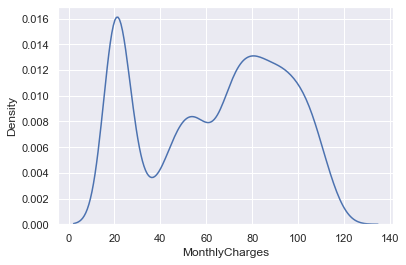

In [21]:
col = 'MonthlyCharges'
display(df[col].describe())
sns.kdeplot(df[col])

In [22]:
col = 'MonthlyCharges'
bins = [-np.inf] + [20*i for i in range(1,6)] + [np.inf]
labels = list(range(6))
df[col+'_cat'] = pd.cut(df[col],bins=bins,labels=labels,
                          include_lowest=True,right=False)

count    5634.000000
mean     2272.147320
std      2256.665497
min         0.000000
25%       386.675000
50%      1397.475000
75%      3775.050000
max      8672.450000
Name: TotalCharges, dtype: float64

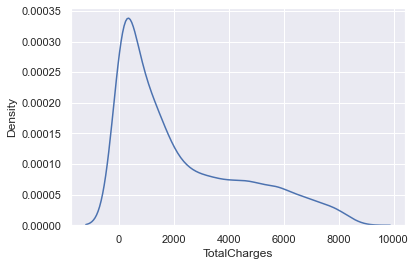

In [23]:
col = 'TotalCharges'
display(df[col].describe())
sns.kdeplot(df[col])

In [24]:
col = 'MonthlyCharges'
bins = [-np.inf] + [1000*i for i in range(1,9)] + [np.inf]
labels = list(range(9))
df[col+'_cat'] = pd.cut(df[col],bins=bins,labels=labels,
                          include_lowest=True,right=False)

In [25]:
df.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,NoSeniorCitizen_Contract_Month-to-month,PaymentMethod0_Contract_Month-to-month0,InternetService_Fiber optic,StreamingTV_NoInternetService,No_OB_DP_TS,TotalServices,SenCit_Dependents,Partner_Dependents,SenCit_Partner,SenCit_Contract,SenCit_TechSupport,SenCit_PayMeth,Contract_mean_totCharges,Contract_totCharges_diff,PayMeth_mean_monthCharges,PayMeth_monthCharges_diff,Tenure_cat,MonthlyCharges_cat
0,0,0,1,0,36,1,2,1,2,2,2,2,0,2,2,1,1,106.05,3834.40,0,1,0,0,0,1,1,2,0,1,1,2,2,1,3683.643192,150.756808,66.703657,39.346343,3,0
1,1,0,0,0,10,1,0,0,2,0,0,2,2,0,0,0,1,62.25,612.95,0,0,1,0,1,1,1,1,0,0,0,0,2,1,1370.923131,-757.973131,66.703657,-4.453657,0,0
2,1,0,1,1,25,1,0,2,1,1,1,1,1,1,0,1,0,19.15,477.60,0,0,1,1,1,0,1,7,1,2,1,0,1,0,1370.923131,-893.323131,62.961703,-43.811703,2,0
3,0,0,0,0,7,1,0,2,1,1,1,1,1,1,0,0,1,20.00,137.60,1,0,1,0,1,0,1,7,0,0,0,0,1,1,1370.923131,-1233.323131,66.703657,-46.703657,0,0
4,0,1,0,0,24,1,0,2,1,1,1,1,1,1,0,1,0,20.30,459.95,0,0,0,1,1,0,1,7,1,0,1,1,2,1,1370.923131,-910.973131,62.961703,-42.661703,2,0


<a id="" ></a>

<h1>  Save Clean Data </h1> 

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover" title="go to TOC">Go to Top</a>

In [26]:
df.to_csv(path_data_clean,index=False)

In [27]:
!du -sh $path_data_clean

900K	../data/processed/train_cleaned.csv
